# 1. Linear regression (86 pts)
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to predict the final price of each home.
In this assignment, you will build linear regression models to predict house sale prices using numerical variables from the dataset.
Among the 79 explanatory variables, 36 are numeric (excluding the 'Id' variable, which is not an explanatory variable).
The following is a list of numerical explanatory variables included in the dataset.

- MSSubClass: The building class
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- OverallQual: Overall material and finish quality
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- MasVnrArea: Masonry veneer area in square feet
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- MiscVal: $ Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold

In [8]:
# Load libraries
# You must not import any additional libraries other than the ones listed below.
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t, f, probplot

In [10]:
# Load dataset
ames = fetch_openml(name="house_prices", as_frame=True)
# Keep only numeric columns
X = ames.data.select_dtypes(np.number)
X = X.set_index('Id')
y = ames.target/1000 # target, house sales prices
y.index = X.index

## (1) Plot a histogram (with 100 bins) and a boxplot to check the distribution of the target variable. (3pts)

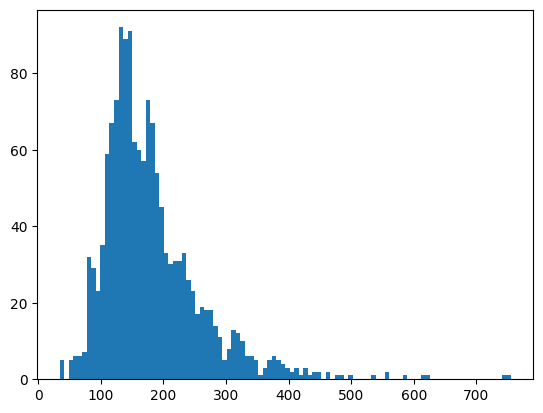

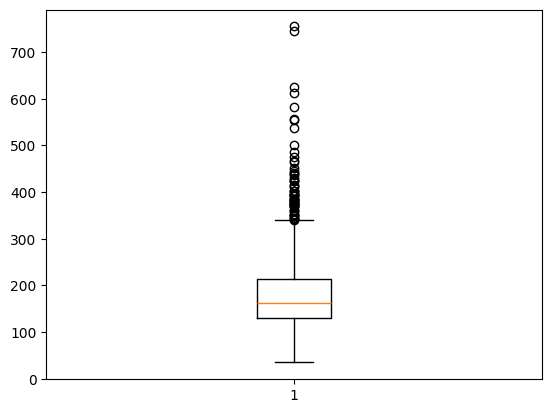

In [14]:
# Make histogram
plt.hist(y, bins=100)
plt.show()


# Make Boxplot
plt.boxplot(y)
plt.show()

## (2) Calculate the mean, Q1, Q2 (median), Q3, and IQR of the target and print these values. (4pts)

In [20]:
# Calcuate Q1, Q2, Q3, and IQR
target = pd.Series(y)
q1 = np.quantile(target, 0.25)
q2 = np.quantile(target, 0.50)
q3 = np.quantile(target, 0.75)
iqr = q3 - q1

# Print Q1, Q2, Q3, and IQR
print(f'Q1: {q1}')
print(f'Q2: {q2}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: 129.975
Q2: 163.0
Q3: 214.0
IQR: 84.025


## (3) Remove outliers in the target variable using IQR. Calculate and print the upper and lower bounds of the target variable using IQR, and print the Ids of the outliers that fall outside this range. (3pts)

In [26]:
# Calculate fence
lower_inner_fence = q1 - (1.5 * iqr)
upper_inner_fence = q3 + (1.5 * iqr)

# Filter outliers
outliers = y[(y < lower_inner_fence) | (y > upper_inner_fence)]
y = y[(y >= lower_inner_fence) & (y <= upper_inner_fence)]

# Print Ids of outliers
print("Id of outliers: ")
for id in outliers.index:
    print(f'{id} ', end="")

Id of outliers: 
12 54 59 113 152 162 179 186 225 232 279 310 314 321 322 337 350 379 390 441 474 478 482 497 516 528 586 592 609 643 645 655 662 665 679 689 692 703 719 770 775 799 804 826 878 899 988 991 1047 1143 1170 1182 1183 1229 1244 1268 1269 1354 1374 1389 1438 

## (4) Check if there are any variables with null values, and if so, print their names. (3pts)

In [225]:
# Find columns including null value
null_including = X.columns[X.isnull().any()]

# Print name of columns including null value
print("Variables with null values: ", end="")
for name in null_including:
    print(f'{name} ', end="")

Variables with null values: 

## (5) Create a new dataset, X1, by removing the outliers identified in (3) and eliminating explanatory variables with null values indentified in (4). Then, print the number of samples and variables in X1. (3pts)

In [38]:
# Remove outliers
X1 = X.drop(outliers.index)

# Eliminae explantory variables with null values
X1 = X1.drop(null_including, axis=1)

# Print number of samples and variables in X1
print(f'Number of Samples: {X1.shape[0]}')
print(f'Number of Variables: {X1.shape[1]}')

Number of Samples: 1399
Number of Variables: 33


## (6) Calculate and print the Variance Inflation Factor (VIF) for the explanatory variables included in X1. (4pts)

In [53]:
# Define function for calculating VIF
def calculate_vif(X):
    X = X.copy()
    vif_dict = {}
    
    for i in range(X.shape[1]):
        target = X.iloc[:, i]
        others = X.drop(X.columns[i], axis=1)
        
        regression = LinearRegression()
        regression.fit(others, target)
        r2 = regression.score(others, target)
        
        if r2 < 1:
            vif = 1 / (1 - r2)
        else:
            vif = np.inf
        vif_dict[X.columns[i]] = vif
        
    return vif_dict

# Print each VIF values
vif_result = calculate_vif(X1)
print("VIF Values For Each Variables")
for key, value in vif_result.items():
    print(f'{key}: {value}')


VIF Values For Each Variables
MSSubClass: 1.489022608765313
LotArea: 1.2510343790605642
OverallQual: 2.887244566334922
OverallCond: 1.5596821331445296
YearBuilt: 3.934724223050014
YearRemodAdd: 2.1591188917749755
BsmtFinSF1: inf
BsmtFinSF2: inf
BsmtUnfSF: inf
TotalBsmtSF: inf
1stFlrSF: inf
2ndFlrSF: inf
LowQualFinSF: inf
GrLivArea: inf
BsmtFullBath: 2.1272821507711757
BsmtHalfBath: 1.1507625054809594
FullBath: 2.7706044089462925
HalfBath: 2.1864203015483707
BedroomAbvGr: 2.3290543852013683
KitchenAbvGr: 1.6092648028516616
TotRmsAbvGrd: 4.809610400681476
Fireplaces: 1.5208304643218744
GarageCars: 5.183522709738617
GarageArea: 4.943046976415389
WoodDeckSF: 1.1839798738296836
OpenPorchSF: 1.2088889837274464
EnclosedPorch: 1.299445699951395
3SsnPorch: 1.0192720716259889
ScreenPorch: 1.1114785015481037
PoolArea: 1.0721719599000346
MiscVal: 1.0244629726235723
MoSold: 1.0506066344749287
YrSold: 1.0535554654178123


## (7) If the VIF is 10 or higher, it indicates a high degree of multicollinearity. The goal is to ensure that all explanatory variables have a VIF below 10. Explain which variables should be removed and provide justification for your choices. (5pts)

#### Targets of removal: 8 variables
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea

#### Why?
These variables were removed because their R² values reached 1 when regressed against the other explanatory variables. This caused their VIF values to approach infinity, which far exceeds the acceptable threshold of 10. Such extreme multicollinearity can lead to unstable coefficient estimates in the regression model.

All remaining variables had VIF values below 10, indicating that multicollinearity was effectively addressed.

## (8) Based on the answer to question (7), remove certain variables from X1 to create a new dataset, X2, where the VIF for all variables is below 10. Then, calculate and print the VIF value withs the names of variable for the explanatory variables included in X2. (4pts)

In [60]:
# Remove VIF above 10
X2 = X1
for key, value in vif_result.items():
    if (value == np.inf):
        X2 = X2.drop(columns=key, axis=1)

# Print each VIF values of X2
vif_result = calculate_vif(X2)
print("VIF Values For Each Variables")
for key, value in vif_result.items():
    print(f'{key}: {value}')

VIF Values For Each Variables
MSSubClass: 1.2828675684357056
LotArea: 1.2119497291651893
OverallQual: 2.5098048994197555
OverallCond: 1.4989402441776831
YearBuilt: 3.4815604421097524
YearRemodAdd: 2.104991821847602
BsmtFullBath: 1.2198299549914648
BsmtHalfBath: 1.073864075637405
FullBath: 2.410380108502583
HalfBath: 1.4103014009571948
BedroomAbvGr: 2.281931918774925
KitchenAbvGr: 1.497195339143851
TotRmsAbvGrd: 3.38709740496027
Fireplaces: 1.4101331502221068
GarageCars: 5.053168893174028
GarageArea: 4.66095482097301
WoodDeckSF: 1.1710744619015405
OpenPorchSF: 1.1833743616403236
EnclosedPorch: 1.287760592143627
3SsnPorch: 1.014896666386644
ScreenPorch: 1.0954657949404742
PoolArea: 1.0502242763458847
MiscVal: 1.021058448949806
MoSold: 1.0471614867635648
YrSold: 1.0511766412919628


## (9) Calculate the Pearson's correlation coefficient between the explanatory variables in X2 and the target, and select the top 5 explanatory variables that have the strongest linear relationship with the target. Then, plot the scatter plots between the target and these selected explanatory variables. (4pts)

Top 5 correlation


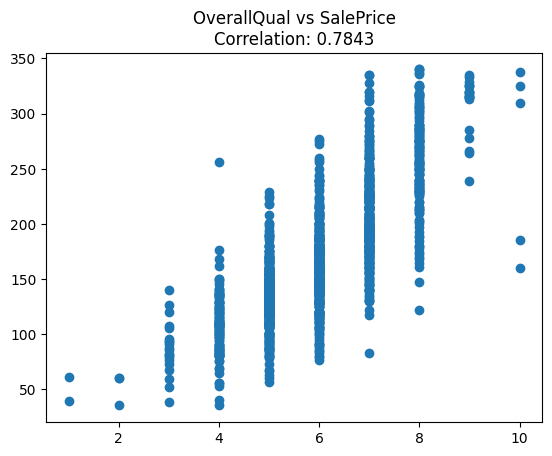

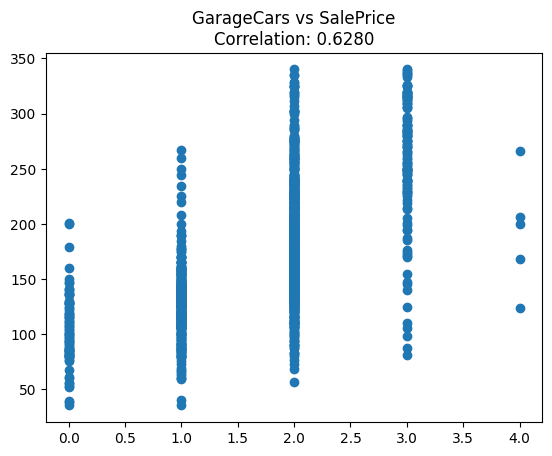

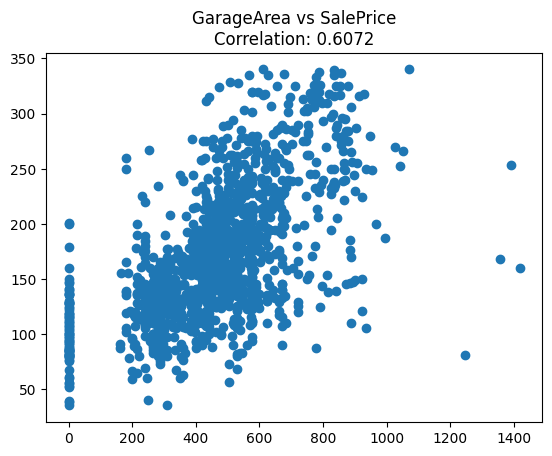

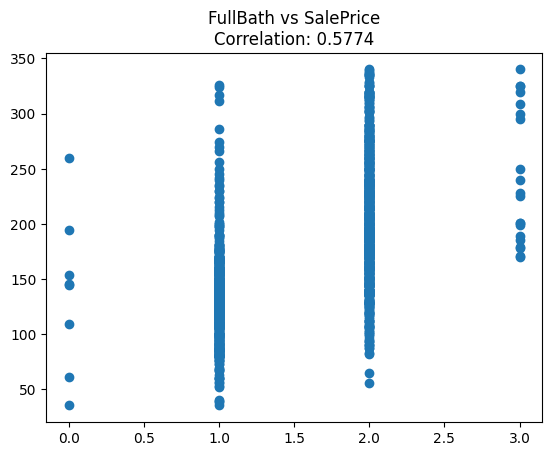

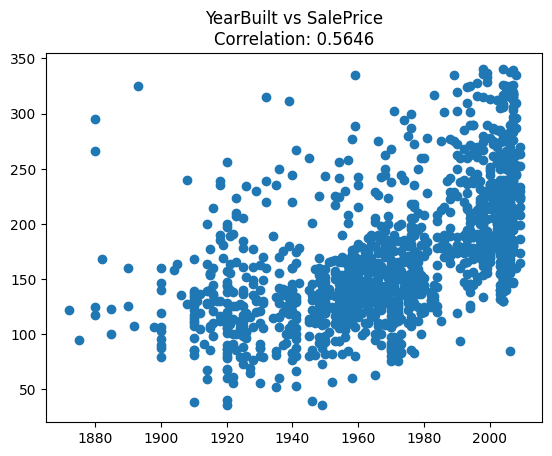

In [66]:
def pearson(X, y):
    X = np.array(X)
    y = np.array(y)
    X_mean = X.mean()
    y_mean = y.mean()
    
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((X - X_mean)**2)) * np.sqrt(np.sum((y - y_mean)**2))
    return numerator / denominator

correlations = {}
for column in X2.columns:
    r = pearson(X2[column], y)
    correlations[column] = abs(r)
    
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
top5 = sorted_correlations[:5]

#
print("Top 5 correlation")
for key, value in top5:
    plt.title(f'{key} vs SalePrice\nCorrelation: {value:.4f}')
    plt.scatter(X2[key], y)
    plt.show()

## (10) After training a linear regression model using X2, compute and display the estimated coefficients, standard errors, and t-values for all explanatory variables, including the intercept. Additionally, calculate the p-values for each variable based on a two-tailed significance test. Present the results in a table format. (5 pts)

cf. https://drive.google.com/file/d/1OkdJfwc-2WNIBfAYa0lwJ4hjdFqTn0OH/view?usp=sharing

In [183]:
X = X2.copy()
X_mat = X.values
y_mat = y.values.reshape(-1, 1)

n = X_mat.shape[0]
p = X_mat.shape[1]
df = n - p - 1  # 자유도: 절편을 따로 고려

X_mat = np.hstack([np.ones((n, 1)), X_mat])  # shape: (n, p+1)

XtX = np.dot(X_mat.T, X_mat)
Xty = np.dot(X_mat.T, y_mat)
XtX_inv = np.linalg.inv(XtX)
beta_hat = np.dot(XtX_inv, Xty)

y_pred = np.dot(X_mat, beta_hat)
residuals = y_mat - y_pred

rss = np.dot(residuals.T, residuals)
sigma_squared = rss / df

se = np.sqrt(np.diag(sigma_squared * XtX_inv)).reshape(-1, 1)

t_values = beta_hat / se

p_values = 2 * (1 - t.cdf(np.abs(t_values), df=df))

columns = ['Intercept'] + list(X.columns)
results = pd.DataFrame({
    'Coefficient': beta_hat.flatten(),
    'Std_Error': se.flatten(),
    't_value': t_values.flatten(),
    'p_value': p_values.flatten()
}, index=columns)

print("=" * 66)
print(f"{'variable':<10}  {'coef':>14}  {'std err':>12}  {'t':>10}  {'P>|t|':>10} ")
print("=" * 66)

for variable, row in results.iterrows():
    print(f" {variable:<10}\t {row['Coefficient']:>12.4f}  "
          f"{row['Std_Error']:>10.4f}  {row['t_value']:>10.4f}  {row['p_value']:>10.4f} ")
print("=" * 66)

variable              coef       std err           t       P>|t| 
 Intercept 	     481.3448   1088.6822      0.4421      0.6585 
 MSSubClass	      -0.1239      0.0185     -6.6841      0.0000 
 LotArea   	       0.0005      0.0001      5.7301      0.0000 
 OverallQual	      17.1798      0.8653     19.8530      0.0000 
 OverallCond	       4.0513      0.7668      5.2831      0.0000 
 YearBuilt 	       0.2896      0.0435      6.6494      0.0000 
 YearRemodAdd	       0.2150      0.0492      4.3707      0.0000 
 BsmtFullBath	      14.0087      1.5027      9.3225      0.0000 
 BsmtHalfBath	       1.6604      3.0117      0.5513      0.5815 
 FullBath  	      13.0158      2.0241      6.4303      0.0000 
 HalfBath  	       3.8046      1.6619      2.2894      0.0222 
 BedroomAbvGr	      -1.9783      1.3126     -1.5072      0.1320 
 KitchenAbvGr	     -10.3009      3.8111     -2.7029      0.0070 
 TotRmsAbvGrd	       7.2560      0.8345      8.6955      0.0000 
 Fireplaces	      10.4661      1.3164 

## (11) Perform an F-test to test the significance of the trained linear regression model and print a table summarizing the test results. (4 pts)
cf. https://drive.google.com/file/d/1A7s_7NGHlqilxAeswbLcYzjafQNPP0Mc/view?usp=sharing

In [204]:
y_mean = y_mat.mean()
SST = np.sum((y_mat - y_mean)**2)

SSE = np.sum((residuals)**2)

SSR = SST - SSE

df_reg = p
df_resid = n - p - 1

MSR = SSR / df_reg
MSE = SSE / df_resid

F_stat = MSR / MSE

F_p_value = 1 - f.cdf(F_stat, df_reg, df_resid)

print("=" * 72)
print(f"{'Type':<15}  {'DF':<5}  {'SS':<12}  {'MS':<12}  {'F':<9}  {'p-value':<10}")
print("=" * 72)
print(f"{'Regression':<15}  {df_reg:<5}  {SSR:<12.4f}  {MSR:<12.4f}  {F_stat:<9.4f}  {F_p_value:<10.4f}")
print(f"{'Residual':<15}  {df_resid:<5}  {SSE:<12.4f}  {MSE:<12.4f}  {'':<9}  {'':<10}")
print(f"{'Total':<15}  {n - 1:<5}  {SST:<12.4f}  {'':<12}  {'':<9}  {'':<10}")
print("=" * 72)


Type             DF     SS            MS            F          p-value   
Regression       25     3962850.6557  158514.0262   231.1322   0.0000    
Residual         1373   941624.6828   685.8155                           
Total            1398   4904475.3385                                     


## (12) Calculate and print the R-squared and adjusted R-squared values. (3 pts)

In [207]:
SST = np.sum((y_mat - y_mat.mean())**2)

SSE = np.sum((residuals)**2)

R2 = 1 - (SSE / SST)

adj_R2 = 1 - ((1 - R2) * (n - 1) / (n - p - 1))

print(f"R-squared: {R2:.4f}")
print(f"Adjusted R-squared: {adj_R2:.4f}")


R-squared: 0.8080
Adjusted R-squared: 0.8045


## (13) This time, you will train the linear regression model after applying a log transformation to the target. First, add 1 to the original target values, then take the natural log to create a new target variable. Afterward, plot a histogram (with 100 bins) and a boxplot for this new target variable. (3 pts)

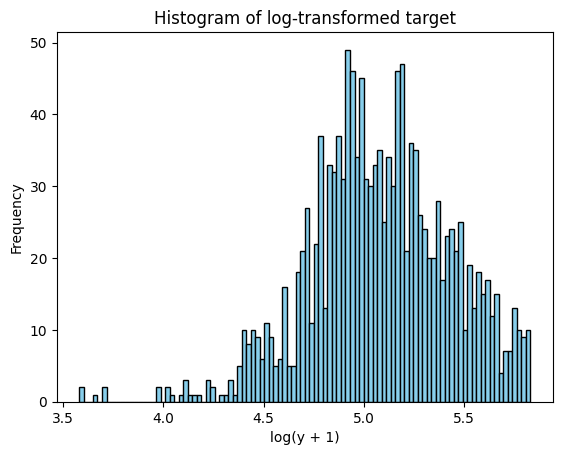

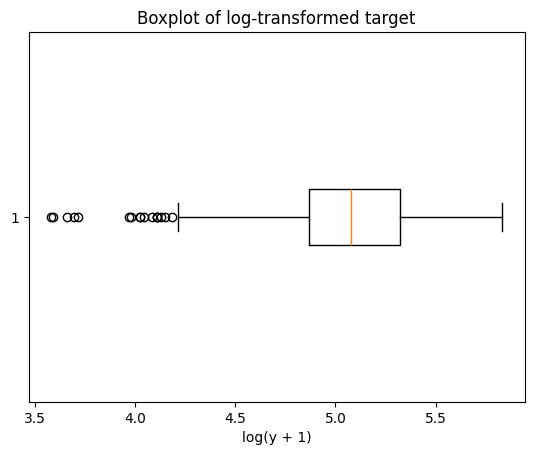

In [213]:
y_log = np.log1p(y)  # log1p(x) == log(x + 1)

plt.hist(y_log, bins=100, color='skyblue', edgecolor='black')
plt.title("Histogram of log-transformed target")
plt.xlabel("log(y + 1)")
plt.ylabel("Frequency")
plt.show()

plt.boxplot(y_log, vert=False)
plt.title("Boxplot of log-transformed target")
plt.xlabel("log(y + 1)")
plt.show()

## (14) Calculate the mean, Q1, Q2 (median), Q3, and IQR of the log-transformed target and print these values. (4 pts)

In [215]:
mean = y_log.mean()
q1 = np.percentile(y_log, 25)
q2 = np.median(y_log)
q3 = np.percentile(y_log, 75)
iqr = q3 - q1

print(f"Mean : {mean:.4f}")
print(f"Q1   : {q1:.4f}")
print(f"Q2   : {q2:.4f} (Median)")
print(f"Q3   : {q3:.4f}")
print(f"IQR  : {iqr:.4f}")


Mean : 5.0828
Q1   : 4.8675
Q2   : 5.0783 (Median)
Q3   : 5.3206
IQR  : 0.4530


## (15) Remove outliers in the log-transformed target variable using IQR. Calculate and print the upper and lower bounds of the target variable using IQR, and print the Ids of the outliers that fall outside this range. (3 pts)

In [219]:
q1 = np.percentile(y_log, 25)
q3 = np.percentile(y_log, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower bound: {lower_bound:.4f}")
print(f"Upper bound: {upper_bound:.4f}")

outliers = y_log[(y_log < lower_bound) | (y_log > upper_bound)]

print("Outlier Ids:")
print(outliers.index.tolist())


Lower bound: 4.1880
Upper bound: 6.0001
Outlier Ids:
[31, 376, 411, 463, 496, 534, 637, 706, 711, 813, 917, 969, 1101, 1326, 1338, 1381, 1433]


## (16) Which has more outliers, the original target or the log-transformed target? And what do you think is the reason for this? (5 pts)

The outliers of log-transformed target is less than original target.
Log transformation compresses large and extreme values, causing values that were originally outliers to fall within the normal range (IQR range).

## (17) Remove the outliers identified in problem (15) from the original X, and select only the explanatory variables included in X2 to create a new input dataset, X3. Then, print the number of samples in X3. (3 pts)

In [221]:
X_no_outliers = X.drop(index=outliers.index)
X3 = X_no_outliers[X2.columns]

print(f"Number of samples in X3: {X3.shape[0]}")


Number of samples in X3: 1382


## (18) You will now train a linear regression model using X3. Compute and display the estimated coefficients, standard errors, and t-values for all explanatory variables, including the intercept. Additionally, calculate the p-values for each variable based on a two-tailed significance test. Present the results in a table format. (5 pts)

In [237]:
X_mat = X3.values
y_clean = y_log.drop(index=outliers.index).values.reshape(-1, 1)
n = X_mat.shape[0]
p = X_mat.shape[1]

X_mat = np.hstack([np.ones((n, 1)), X_mat])
df = n - p - 1

XtX = np.dot(X_mat.T, X_mat)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X_mat.T, y_clean)
beta_hat = np.dot(XtX_inv, Xty)

y_pred = np.dot(X_mat, beta_hat)
residuals = y_clean - y_pred

sigma_squared = np.dot(residuals.T, residuals) / df
se = np.sqrt(np.diag(sigma_squared * XtX_inv)).reshape(-1, 1)

t_values = beta_hat / se

p_values = 2 * (1 - t.cdf(np.abs(t_values), df=df))

column_names = ['Intercept'] + list(X3.columns)
results = pd.DataFrame({
    'Coefficient': beta_hat.flatten(),
    'Std_Error': se.flatten(),
    't_value': t_values.flatten(),
    'p_value': p_values.flatten()
}, index=column_names)

print("=" * 66)
print(f"{'variable':<10}  {'coef':>14}  {'std err':>12}  {'t':>10}  {'P>|t|':>10} ")
print("=" * 66)

for variable, row in results.iterrows():
    print(f" {variable:<10}\t {row['Coefficient']:>12.4f}  "
          f"{row['Std_Error']:>10.4f}  {row['t_value']:>10.4f}  {row['p_value']:>10.4f} ")
print("=" * 66)


variable              coef       std err           t       P>|t| 
 Intercept 	       7.2043      5.7815      1.2461      0.2129 
 MSSubClass	      -0.0007      0.0001     -6.9355      0.0000 
 LotArea   	       0.0000      0.0000      5.7550      0.0000 
 OverallQual	       0.0894      0.0046     19.2886      0.0000 
 OverallCond	       0.0387      0.0042      9.2892      0.0000 
 YearBuilt 	       0.0024      0.0002     10.3398      0.0000 
 YearRemodAdd	       0.0012      0.0003      4.5864      0.0000 
 BsmtFullBath	       0.0815      0.0080     10.2473      0.0000 
 BsmtHalfBath	       0.0226      0.0159      1.4248      0.1544 
 FullBath  	       0.0797      0.0108      7.4071      0.0000 
 HalfBath  	       0.0291      0.0088      3.3112      0.0010 
 BedroomAbvGr	       0.0105      0.0070      1.4904      0.1364 
 KitchenAbvGr	      -0.0514      0.0202     -2.5443      0.0111 
 TotRmsAbvGrd	       0.0336      0.0044      7.5712      0.0000 
 Fireplaces	       0.0678      0.0070 

## (19) Perform an F-test to test the significance of the trained linear regression model trained in question (18) and print a table summarizing the test results. (4 pts)

In [239]:
y_mean = y_clean.mean()
SST = np.sum((y_clean - y_mean)**2)

SSE = np.sum((residuals)**2)

SSR = SST - SSE

df_reg = p
df_resid = n - p - 1

MSR = SSR / df_reg
MSE = SSE / df_resid

F_stat = MSR / MSE

p_value = 1 - f.cdf(F_stat, df_reg, df_resid)


print("=" * 72)
print(f"{'Type':<15}  {'DF':<5}  {'SS':<12}  {'MS':<12}  {'F':<9}  {'p-value':<10}")
print("=" * 72)
print(f"{'Regression':<15}  {df_reg:<5}  {SSR:<12.4f}  {MSR:<12.4f}  {F_stat:<9.4f}  {F_p_value:<10.4f}")
print(f"{'Residual':<15}  {df_resid:<5}  {SSE:<12.4f}  {MSE:<12.4f}  {'':<9}  {'':<10}")
print(f"{'Total':<15}  {n - 1:<5}  {SST:<12.4f}  {'':<12}  {'':<9}  {'':<10}")
print("=" * 72)

Type             DF     SS            MS            F          p-value   
Regression       25     125.7904      5.0316        263.9196   0.0000    
Residual         1356   25.8521       0.0191                             
Total            1381   151.6425                                         


## (20) Calculate and print the R-squared and adjusted R-squared values of the linear regression model trained in question (18). (3 pts)

In [242]:
R2 = 1 - (SSE / SST)

adj_R2 = 1 - ((1 - R2) * (n - 1)) / (n - p - 1)

print(f"R-squared: {R2:.4f}")
print(f"Adjusted R-squared: {adj_R2:.4f}")

R-squared: 0.8295
Adjusted R-squared: 0.8264


## (21) Calculate the residuals for the two linear regression models obtained above, and create a Q-Q plot (assume normal distribution) for the residuals of both models. (3 pts)

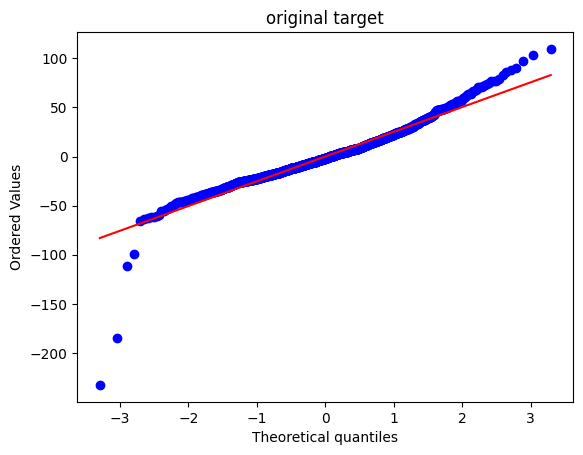

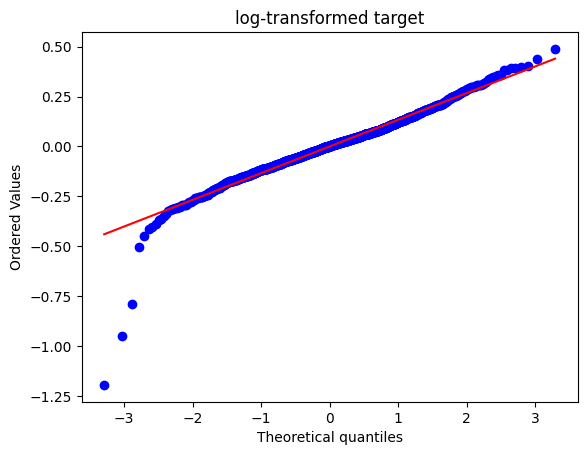

In [253]:
X2_mat = np.hstack([np.ones((X2.shape[0], 1)), X2.values])
y_vec = y.values.reshape(-1, 1)

beta_1 = np.linalg.inv(X2_mat.T @ X2_mat) @ (X2_mat.T @ y_vec)

y_pred_1 = X2_mat @ beta_1
residuals_1 = y_vec - y_pred_1


X3_mat = np.hstack([np.ones((X3.shape[0], 1)), X3.values])
y_log_clean = y_log.drop(index=outliers.index).values.reshape(-1, 1)

beta_2 = np.linalg.inv(X3_mat.T @ X3_mat) @ (X3_mat.T @ y_log_clean)
y_pred_2 = X3_mat @ beta_2
residuals_2 = y_log_clean - y_pred_2

probplot(residuals_1.flatten(), dist="norm", plot=plt)
plt.title("original target")
plt.show()

probplot(residuals_2.flatten(), dist="norm", plot=plt)
plt.title("log-transformed target")
plt.show()


## (22) Next, plot the residual plots for both models. The x-axis should represent the predicted values, and the y-axis should represent the residuals. (3 pts)

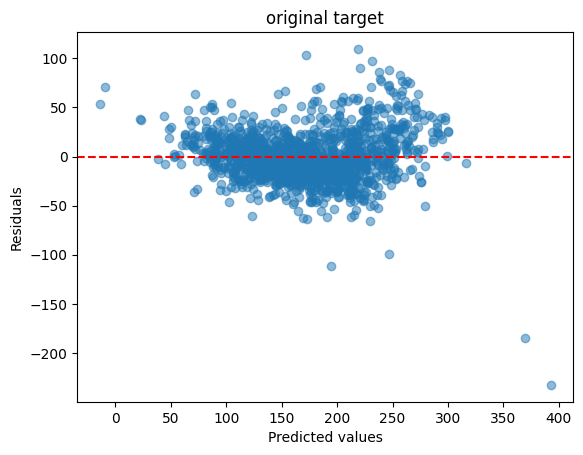

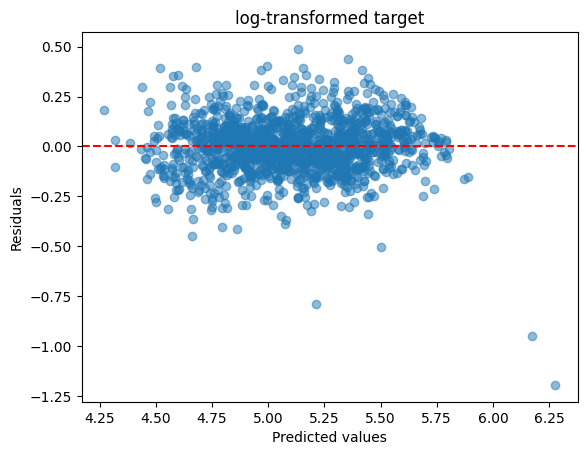

In [259]:
plt.scatter(y_pred_1, residuals_1, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("original target")
plt.show()

plt.scatter(y_pred_2, residuals_2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("log-transformed target")
plt.show()

## (23) Based on the results from problems (21) and (22), explain which linear regression model performs better. (5 pts)

The Q-Q plot of the original target model reveals significant deviations from the normal distribution,  
particularly in the tails, indicating violation of the normality assumption.  
In contrast, the log-transformed model shows residuals closely aligned to the diagonal line,  
suggesting a better approximation to normality.

The residual plot for the original model also exhibits clear heteroscedasticity,  
with residuals spreading wider as predicted values increase.  
After log transformation, this pattern disappears, and the residuals appear randomly scattered around zero,  
supporting the assumptions of linearity and constant variance.

Overall, the log-transformed model provides a more reliable regression fit under the classical assumptions.


In [ ]:
# If additional analysis is required to answer this question, please write the code here.

# 2. Logistic regression (14 pts)

Using the MAGIC Gamma Telescope dataset, build a classifier using logistic regression. The target contains two classes: "g" and "h", where "g" indicates gamma (signal) and "h" indicates hadron (background). 

The included explanatory variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 

In [277]:
# Load libraries
# You must not import any additional libraries other than the ones listed below.
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [295]:
# Load dataset
magic = fetch_openml(name="MagicTelescope", as_frame=True)
X = magic.data.select_dtypes(np.number)
y = magic.target

# data partition
trnX,valX,trnY,valY=train_test_split(X.values,y.values,test_size=0.2,random_state=10, stratify=y)

C:\Users\itisyijy\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name magictelescope exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=1120
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43971

  warn(warning_msg)


## (1) Select one variable from the 10 variables and train 10 different logistic regression models using the training dataset (trnX). Then, use the validation dataset (valX) to calculate the accuracy of each model. (4 pts)

In [332]:
variable_names = X.columns.tolist()
accuracies = []

for i, var in enumerate(variable_names):
    trnX_i = trnX[:, i].reshape(-1, 1)
    valX_i = valX[:, i].reshape(-1, 1)

    model = LogisticRegression()
    model.fit(trnX_i, trnY)

    preds = model.predict(valX_i)

    acc = np.mean(preds == valY)
    accuracies.append((var, acc))

print("Accuracy (without accuracy_score):")
for var, acc in accuracies:
    print(f"{var:<15} : {acc:.4f}")

Accuracy (without accuracy_score):
fLength:        : 0.7200
fWidth:         : 0.7140
fSize:          : 0.6498
fConc:          : 0.6483
fConc1:         : 0.6483
fAsym:          : 0.6827
fM3Long:        : 0.7014
fM3Trans:       : 0.6483
fAlpha:         : 0.7361
fDist:          : 0.6483


## (2) Using the top two variables with the highest accuracy obtained in problem (1), train a logistic regression model on trnX. Plot the decision boundary showing equal probability values for classes g and h (x-axis = the variable with the highest accuracy, y-axis = the variable with the second-highest accuracy) along with scatter plots of the training samples. In the plot, assign different colors based on the predicted class for the scatter plot and label the areas of the two classes (g and h) with their respective class names. (5 pts)

Ref. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

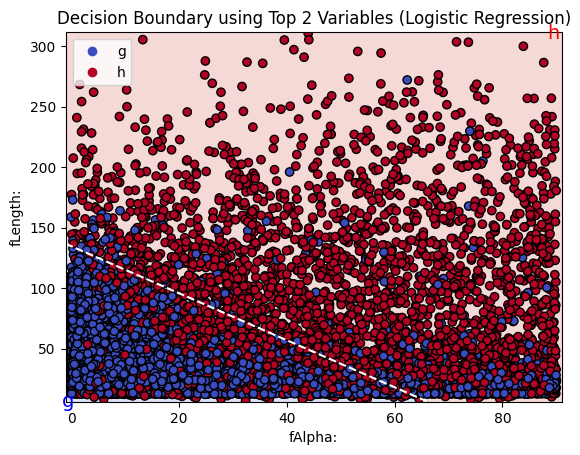

In [379]:
y = np.where(y == 'g', 0, 1)

accuracies_sorted = sorted(accuracies, key=lambda x: x[1], reverse=True)
top2_vars = [accuracies_sorted[0][0], accuracies_sorted[1][0]]
top2_indices = [variable_names.index(top2_vars[0]), variable_names.index(top2_vars[1])]

X2d = trnX[:, top2_indices]
y = trnY

model = LogisticRegression()
model.fit(X2d, y)

x_min, x_max = X2d[:, 0].min() - 1, X2d[:, 0].max() + 1
y_min, y_max = X2d[:, 1].min() - 1, X2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points).reshape(xx.shape)
Z_proba = model.predict_proba(grid_points)[:, 1].reshape(xx.shape)  # 확률

Z = np.where(Z == 0, 0, 1)

Z_proba = np.nan_to_num(Z_proba, nan=0.5, posinf=1, neginf=0)


plt.contour(xx, yy, Z_proba, levels=[0.5], cmap="Greys", linestyles='--')

plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")

scatter = plt.scatter(X2d[:, 0], X2d[:, 1], c=y, cmap="coolwarm", edgecolors='k')

plt.text(x_min + 0.5, y_min + 0.5, "g", fontsize=14, color='blue', ha='center', va='center')
plt.text(x_max - 1.5, y_max - 1.0, "h", fontsize=14, color='red', ha='center', va='center')

plt.xlabel(top2_vars[0])
plt.ylabel(top2_vars[1])
plt.title("Decision Boundary using Top 2 Variables (Logistic Regression)")
plt.legend(handles=scatter.legend_elements()[0], labels=["g", "h"])
plt.show()


## (3) Using all input variables in the MAGIC Gamma Telescope dataset, calculate the accuracy with varying cutoffs for the final decision (if the probability of class 'g' ≥ cutoff, the predicted target value is 'g'). The cutoff values are in the set {0.1, 0.15, 0.2, 0.25, ..., 0.95}. Draw a line plot (x = cutoff, y = accuracy). For this problem, the model is trained using trnX, and accuracy is calculated using valX. (5 pts)

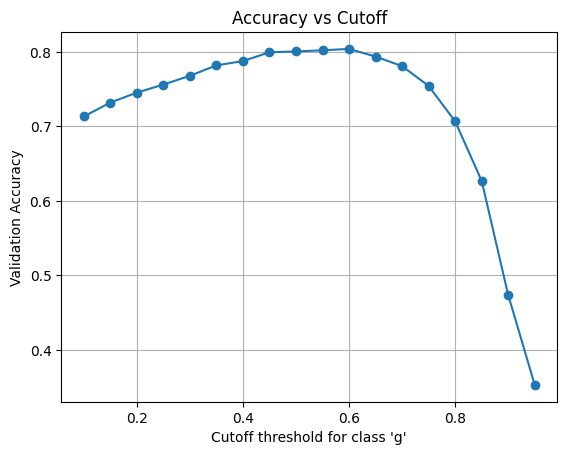

In [307]:
model = LogisticRegression(max_iter=1000)
model.fit(trnX, trnY)

g_index = np.where(model.classes_ == 'g')[0][0]

proba_g = model.predict_proba(valX)[:, g_index]

cutoffs = np.arange(0.1, 0.96, 0.05)
accuracies = []

for c in cutoffs:
    preds = np.where(proba_g >= c, 'g', 'h')
    acc = np.mean(preds == valY)
    accuracies.append(acc)

plt.plot(cutoffs, accuracies, marker='o')
plt.xlabel("Cutoff threshold for class 'g'")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Cutoff")
plt.grid(True)
plt.show()